<a href="https://colab.research.google.com/github/a6iyyu/MachineLearning_3F_23/blob/main/JS14/TG1_2_3_JS14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🦁 Lab 1**

Klasifikasi Cats vs. Dogs

## Langkah 1 - _Import Library_

In [1]:
!pip install keras tensorflow

In [2]:
from google.colab import drive
from keras.preprocessing import image
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
import numpy as np
import os
import tensorflow as tf

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path_zip = '/content/drive/MyDrive/Colab Notebooks/dataset.zip'

if os.path.exists(path_zip):
    with ZipFile(path_zip, 'r') as zip_ref:
        zip_ref.extractall('/content/')
    print("Berhasil mengekstrak dataset!")
else:
    print(f"File tidak ditemukan di: {path_zip}.")

Berhasil mengekstrak dataset!


## Langkah 2 - Pra Pengolahan Data

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

### Langkah 2.1. Pra Pengolahan Data Training

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1.  - Inisiasi Model CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Langkah 3.3 - Pembuatan Layer Pooling 1

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan **_loss function binary crossentropy_** dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

## Langkah 4 - Fit CNN

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 261ms/step - accuracy: 0.5357 - loss: 0.6948 - val_accuracy: 0.6345 - val_loss: 0.6499
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 259ms/step - accuracy: 0.6499 - loss: 0.6303 - val_accuracy: 0.6900 - val_loss: 0.5861
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 66s 262ms/step - accuracy: 0.6955 - loss: 0.5747 - val_accuracy: 0.7340 - val_loss: 0.5391
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 253ms/step - accuracy: 0.7317 - loss: 0.5317 - val_accuracy: 0.7495 - val_loss: 0.5264
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 252ms/step - accuracy: 0.7490 - loss: 0.5060 - val_accuracy: 0.7505 - val_loss: 0.5200
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 261ms/step - accuracy: 0.7745 - loss: 0.4657 - val_accuracy: 0.7590 - val_loss: 0.4832
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 271ms/step - accuracy: 0.7770 - loss: 0.4688 - val_accuracy: 0.7740 - val_loss: 0.4837
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 252ms/step - accuracy: 0.7878 - loss: 0

## Langkah 5 - Prediksi dengan 1 Citra

In [16]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


# 🐹 Lab 2

Klasifikasi Multilabel dengan dataset CIFAR

## Langkah 1 - _Load Library_

In [17]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

## Langkah 2 - Unduh Dataset CIFAR

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## Langkah 3 - Verifikasi Data

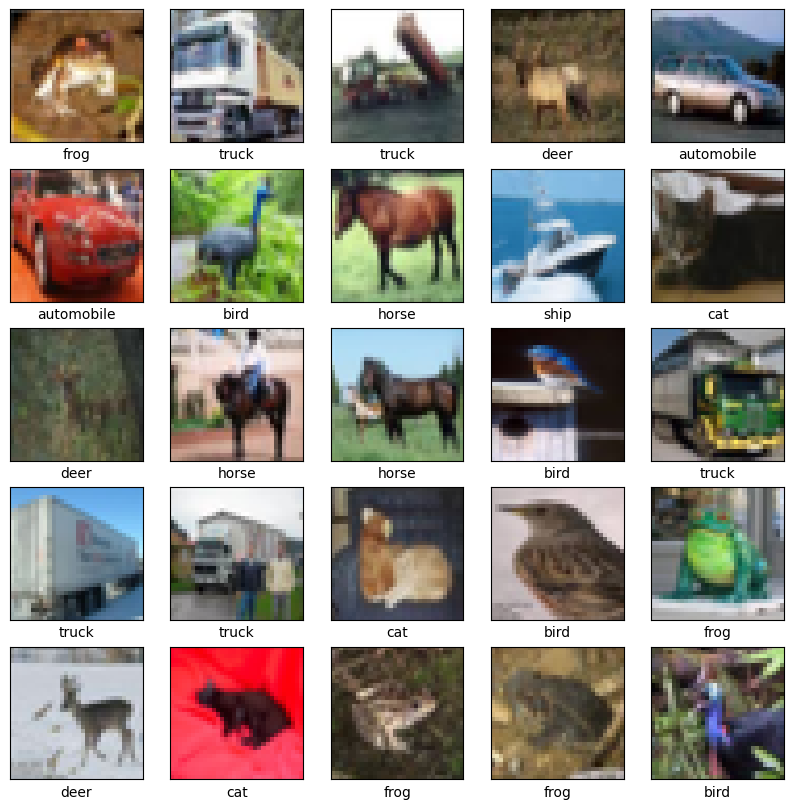

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays, which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN

### Langkah 4.1. - Buat Layer Konvolusi

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Langkah 4.2. - Cek Arsitektur Konvolusi

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.3. - Tambahkan Layer Fully Connected

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Langkah 4.4. - Cek Arsitektur Model CNN

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.5. - Compile Model CNN

In [24]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Langkah 5 - Fit Model

In [25]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 57ms/step - accuracy: 0.3462 - loss: 1.7553 - val_accuracy: 0.5397 - val_loss: 1.2840
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.5640 - loss: 1.2266 - val_accuracy: 0.6084 - val_loss: 1.1092
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.6348 - loss: 1.0365 - val_accuracy: 0.6415 - val_loss: 1.0207
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 56ms/step - accuracy: 0.6742 - loss: 0.9278 - val_accuracy: 0.6650 - val_loss: 0.9533
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7007 - loss: 0.8599 - val_accuracy: 0.6838 - val_loss: 0.9154
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.7253 - loss: 0.7825 - val_accuracy: 0.6666 - val_loss: 0.9538
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.7428 - loss: 0.7361 - val_accuracy: 0.6946 - val_loss: 0.8877
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7616 

## Langkah 6 - Evaluasi Model

Hasil proses training,
313/313 - 4s - 13ms/step - accuracy: 0.7067 - loss: 0.8776


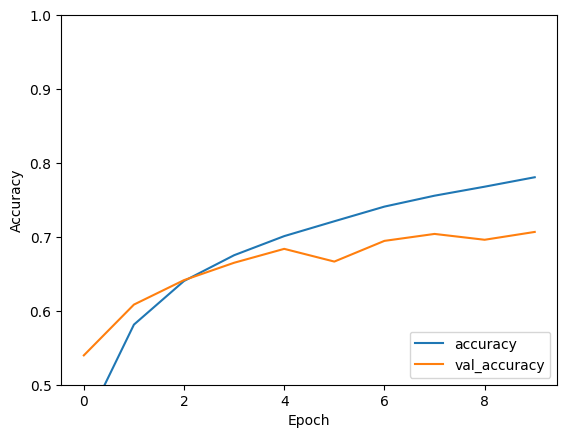

In [26]:
print('Hasil proses training,')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

In [27]:
print(f"{test_acc:.4f}")

0.7067


> **Berapa akurasi yang Anda dapatkan?**
>
> Akurasi yang didapatkan adalah 0.7067

# **🐘 Tugas Lab**

- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

> Impor _Library_

In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

> Load dataset CIFAR-10

In [29]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi pixel (0-255 menjadi 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

> Definisi Model

In [30]:
model = models.Sequential()

In [31]:
# Blok 1 (Ekstraksi Fitur Awal)
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization()) # Menstabilkan learning
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

In [32]:
# Blok 2 (Ekstraksi Fitur Menengah)
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

In [33]:
# Blok 3 (Ekstraksi Fitur Kompleks)
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

# --- Classifier (Klasifikasi) ---
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

> Kompilasi dan Augmentasi Data

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Membuat variasi data (Augmentation) agar akurasi tembus 80%
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range=15)
datagen.fit(train_images)

> Pelatihan

In [35]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 595s 754ms/step - accuracy: 0.3049 - loss: 2.1647 - val_accuracy: 0.4866 - val_loss: 1.4318
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 577s 738ms/step - accuracy: 0.5285 - loss: 1.3234 - val_accuracy: 0.5790 - val_loss: 1.2366
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 558s 713ms/step - accuracy: 0.6102 - loss: 1.0982 - val_accuracy: 0.6491 - val_loss: 1.0157
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 564s 715ms/step - accuracy: 0.6613 - loss: 0.9748 - val_accuracy: 0.6653 - val_loss: 0.9807
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 559s 715ms/step - accuracy: 0.6886 - loss: 0.9018 - val_accuracy: 0.6933 - val_loss: 0.8863
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 573s 733ms/step - accuracy: 0.7104 - loss: 0.8400 - val_accuracy: 0.7152 - val_loss: 0.8530
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 578s 739ms/step - accuracy: 0.7263 - loss: 0.7956 - val_accuracy: 0.7263 - val_loss: 0.8017
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 579s 740ms/step - accuracy: 0.7389 -

> Evaluasi Hasil

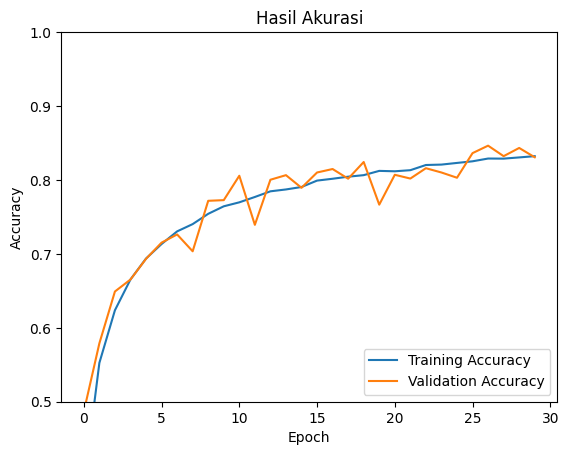

313/313 - 25s - 80ms/step - accuracy: 0.8307 - loss: 0.5028

✅ Akurasi Testing Akhir: 83.07%


In [36]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Hasil Akurasi')
plt.show()

# Cetak akurasi final
loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n✅ Akurasi Testing Akhir: {accuracy*100:.2f}%")

- Buatlah model CNN untuk klasifikasi dataset MNIST.

In [39]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

> Load dan Pra Pengolahan Data

In [43]:
# Load dataset MNIST (angka tulisan tangan)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalisasi nilai pixel (0-255 menjadi 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN membutuhkan dimensi channel (28, 28, 1) dan harus di-reshape.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
print(f"Ukuran Data Training: {train_images.shape}")

Ukuran Data Training: (60000, 28, 28, 1)


> Definisi Model CNN

In [44]:
model = models.Sequential()

# Layer Konvolusi 1
# Input shape disesuaikan dengan (28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten & Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 Output (Angka 0-9)

# Tampilkan ringkasan model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

> Pelatihan Model

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# MNIST sangat mudah dipelajari, 5-10 epoch biasanya sudah cukup
print("\nMulai Training MNIST...")
history = model.fit(train_images, train_labels, epochs=5,  validation_data=(test_images, test_labels))


Mulai Training MNIST...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.8851 - loss: 0.3695 - val_accuracy: 0.9810 - val_loss: 0.0592
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9841 - loss: 0.0503 - val_accuracy: 0.9841 - val_loss: 0.0511
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9893 - loss: 0.0358 - val_accuracy: 0.9874 - val_loss: 0.0386
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9886 - val_loss: 0.0361
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9898 - val_loss: 0.0346


> Evaluasi

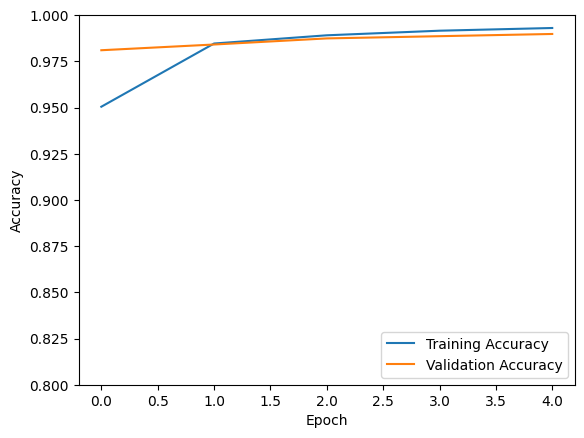

313/313 - 3s - 9ms/step - accuracy: 0.9898 - loss: 0.0346

✅ Akurasi Testing MNIST: 98.98%


In [46]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1]) # Fokus grafik di area akurasi tinggi
plt.legend(loc='lower right')
plt.show()

# Cetak hasil akhir
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\n✅ Akurasi Testing MNIST: {test_acc*100:.2f}%")